In [44]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import special, optimize

In [45]:
data = pd.read_csv('ex2/ex2data1.txt', header=None, names=['x1', 'x2', 'o'])

In [46]:
data.head()

,x1,x2,o
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [47]:
data.describe()

,x1,x2,o
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [48]:
admitted = data[data['o'] == 1]

In [49]:
admitted.head()

,x1,x2,o
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [50]:
other = data[data['o'] == 0]

<IPython.core.display.Javascript object>


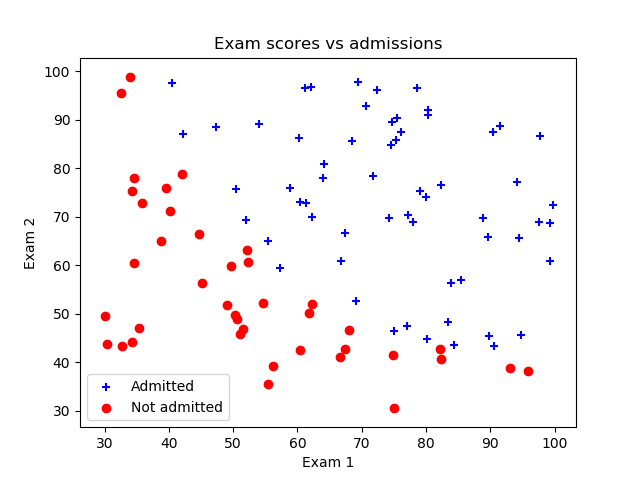

In [51]:
plt.figure(1)
plt.scatter(admitted.x1, admitted.x2, marker = '+', c='b', label='Admitted')
plt.scatter(other.x1, other.x2, marker = 'o', c='r', label='Not admitted')
plt.title('Exam scores vs admissions')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()
plt.show()

In [52]:
m = data.shape[0]
n = data.shape[1] - 1

In [53]:
X = data.iloc[:, :2]
X.insert(0, 'x0', 1)
Y = data.iloc[:, 2]
params = np.asarray([0, 0, 0])

In [54]:
X.head()

,x0,x1,x2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [55]:
Y.head()

0    0
1    0
2    0
3    1
4    1
Name: o, dtype: int64

In [56]:
def h():
    return special.expit(np.dot(X, params))

def evalCostInSet():
    s = (np.dot(Y.T, np.log(h())) + np.dot(np.transpose(1 - Y), np.log(1 - h())))
    return -s/m

def ht(theta):
    return special.expit(np.dot(X, theta))

def evalCost(theta):
    s = (np.dot(Y.T, np.log(ht(theta))) + np.dot(np.transpose(1 - Y), np.log(1 - ht(theta))))
    return -s/m

In [57]:
evalCostInSet()

0.69314718055994518

In [58]:
evalCost(params)

0.69314718055994518

In [59]:
def jacobian(theta):
    return np.dot(X.T, ht(theta) - Y)/m

In [60]:
res = optimize.fmin_tnc(func=evalCost, x0=params, fprime=jacobian)

In [61]:
res

(array([-25.16131869,   0.20623159,   0.20147149]), 36, 0)

In [62]:
params = res[0]

In [63]:
evalCostInSet()

0.20349770158947436

<IPython.core.display.Javascript object>


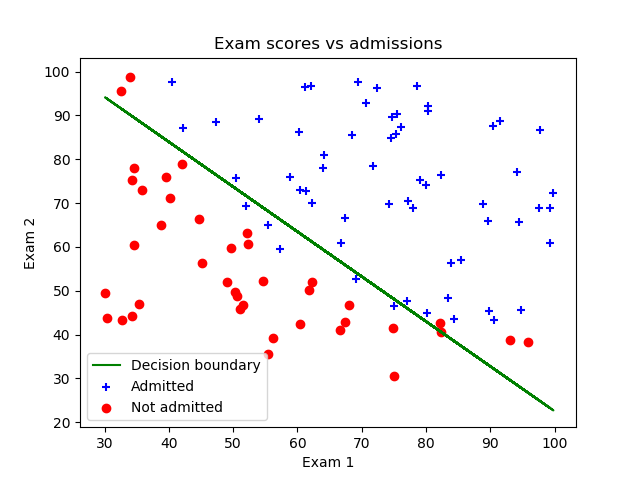

In [64]:
#Decision boundary
x2 = (params[1]*(X.x1) + params[0])/(-1 * params[2])
plt.figure(2)
plt.scatter(admitted.x1, admitted.x2, marker = '+', c='b', label='Admitted')
plt.scatter(other.x1, other.x2, marker = 'o', c='r', label='Not admitted')
plt.plot(X.x1, x2, c='g', label='Decision boundary')
plt.title('Exam scores vs admissions')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


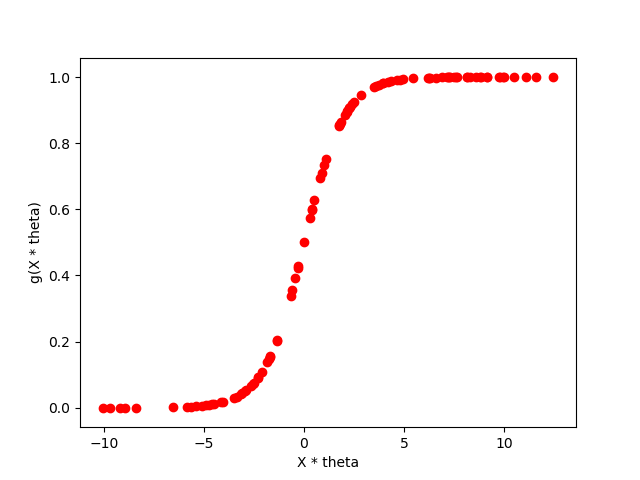

In [72]:
plt.figure(3)
plt.scatter(np.dot(X, params), h(), color='r', label='Logistic function')
plt.xlabel('X * theta')
plt.ylabel('g(X * theta)')
plt.show()

In [73]:
def evalHyp(x):
    return(special.expit(np.dot(params, x)))

In [81]:
evalHyp(np.asarray([1, 45, 85]))

0.77629062439258412